## Two-point-correlation function

In this notebook I generate random data to study the differents correlations functions estimators such as Landy-Szlay, Hamilton and Peebles.

The random data represents ramdom object's positions and by means of the estimators I computed the correlation between this randoms and three diferents configurations: the fill circle 'cluster position data'; the circle with a hole; and the squere configuration.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [ ]:
data = np.random.random((1000, 2))

In [ ]:
a = np.random.randn(20)
print(a.)

[ 2.48979708 -1.31521457 -1.66214371 -2.35269971  0.3858317  -0.36352852
 -0.49597446  1.18691526  1.16886905 -0.89525264  0.52004428  0.45445965
  0.33134289 -1.15017797  0.39252648 -1.68490656 -0.33051106  1.26870259
  1.15190943 -0.17785488]


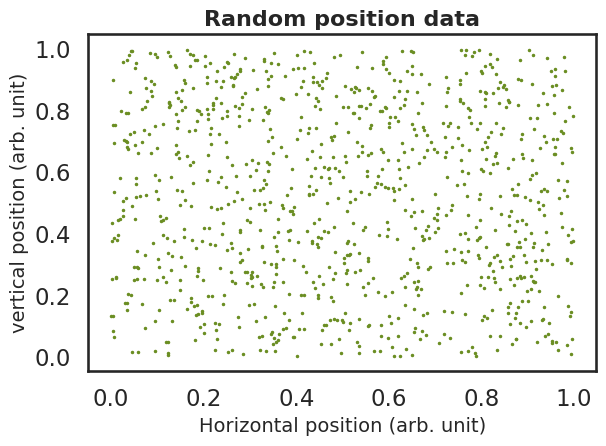

In [ ]:
# Establecer un estilo elegante de Seaborn
sns.set(style="white", context="talk")  # "talk" ajusta el tamaño de fuente para presentaciones

# Usar una paleta sutil de Seaborn
color_line = sns.color_palette("dark")[4]  # Un tono azul elegante
color_fill = sns.color_palette("dark")[4]  # Usamos el mismo color para el área


nn = 14
NN = 16

plt.plot(data[:,0], data[:,1], '.',  markersize=3, color='olivedrab', rasterized=True)
plt.title('Random position data', fontsize=NN, weight='bold')
plt.xlabel('Horizontal position (arb. unit)', fontsize=nn)
plt.ylabel('vertical position (arb. unit)', fontsize=nn)

#plt.subplots_adjust(top=0.925,
#                    bottom=0.20,
#                    left=0.07,
#                    right=0.90,
#                    hspace=0.01,
#                    wspace=0.01)

plt.tight_layout()
#plt.savefig('RR data.pdf', format='pdf')

In [ ]:
# Filter

x0, y0 = 0.5, 0.5 # center of the circle
r0 = 0.2 # radius of the circle

def distance(x1, x2, y1, y2):
  d = math.sqrt((x2-x1)**2 + (y2-y1)**2)
  return d

data_filter_xpos = []
data_filter_ypos = []

for i in range(len(data[:])):
  s = distance(data[i,0], x0, data[i,1], y0)
  if  s <= r0:
    data_filter_xpos.append(data[i,0])
    data_filter_ypos.append(data[i,1])
  else:
    pass

data_filter = np.array([data_filter_xpos, data_filter_ypos])

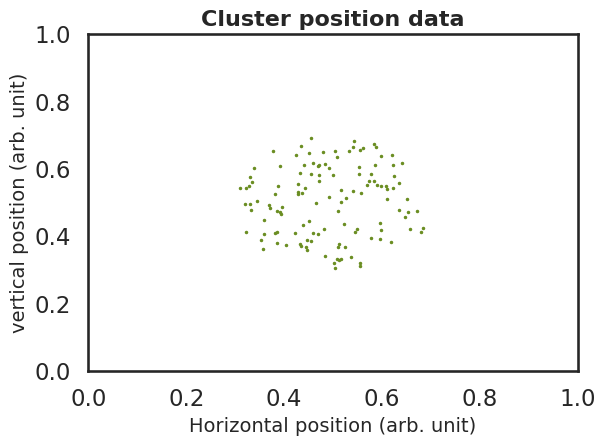

In [ ]:
# Establecer un estilo elegante de Seaborn
sns.set(style="white", context="talk")  # "talk" ajusta el tamaño de fuente para presentaciones

# Usar una paleta sutil de Seaborn
color_line = sns.color_palette("dark")[4]  # Un tono azul elegante
color_fill = sns.color_palette("dark")[4]  # Usamos el mismo color para el área

plt.plot(data_filter[0], data_filter[1],".", markersize=3, color='olivedrab', rasterized=True)
plt.title('Cluster position data',  fontsize=NN, weight='bold')
plt.xlabel('Horizontal position (arb. unit)', fontsize=nn)
plt.ylabel('vertical position (arb. unit)', fontsize=nn)

plt.xlim([0,1])
plt.ylim([0,1])

plt.tight_layout()
plt.savefig('DD data.pdf', format='pdf')

# Approximation to correlation function as:

$$ \xi =  \frac{DD - RR}{RR}$$

In [ ]:
def distanceS(points):

  xpoints = points[:, 0]
  ypoints = points[:, 1]

  d = []
  for i in range(len(xpoints)):
    for j in range(len(ypoints)):
      if i != j:
        d.append( math.sqrt( (xpoints[i] - xpoints[j])**2 + (ypoints[i] - ypoints[j])**2 ) )
      else:
        pass

    return d

In [ ]:
def distanceSS(points1, points2):

  x1_points = points1[:, 0]
  y1_points = points1[:, 1]

  x2_points = points2[:, 0]
  y2_points = points2[:, 1]

  d = []
  for i in range(len(x1_points)):
    for j in range(len(y1_points)):
      if i != j:
        d.append( math.sqrt( (x1_points[i] - x2_points[j])**2 + (y1_points[i] - y2_points[j])**2 ) )
      else:
        pass

    return d

In [ ]:
RR_distances = distanceS(data)
DD_distances = distanceS(data_filter.T)
DR_distances = distanceSS(data_filter.T, data)

print(data_filter.T.shape, data.shape)

(126, 2) (1000, 2)


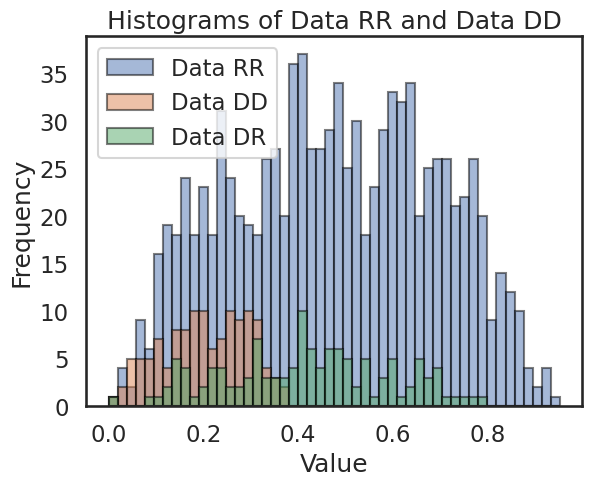

In [ ]:
combined_data = RR_distances + DD_distances + DR_distances
min_val = min(combined_data)
max_val = max(combined_data)

num_bins = 50
bin_edges = np.linspace(min_val, max_val, num_bins + 1)

plt.hist(RR_distances, bins=bin_edges, alpha=0.5, label='Data RR', edgecolor='black')
plt.hist(DD_distances, bins=bin_edges, alpha=0.5, label='Data DD', edgecolor='black')
plt.hist(DR_distances, bins=bin_edges, alpha=0.5, label='Data DR', edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Data RR and Data DD')
plt.legend()
plt.show()

In [ ]:
RR, RR_bins = np.histogram(RR_distances, bins=bin_edges)
DD, DD_bins = np.histogram(DD_distances, bins=bin_edges)
DR, DR_bins = np.histogram(DR_distances, bins=bin_edges)

In [ ]:
def correlation(dd, dr, rr):
  xi = (dd - 2*dr + rr)/rr
  return xi

def correlation_DavidPeebles(dd, dr, rr):
    NR = len(rr)
    ND = len(dd)
    xi = (NR*dd)/(ND*dr) -1
    return xi

def correlation_Hamilton(dd, dr, rr):
    xi = (dd*rr)/(dr**2) -1
    return xi

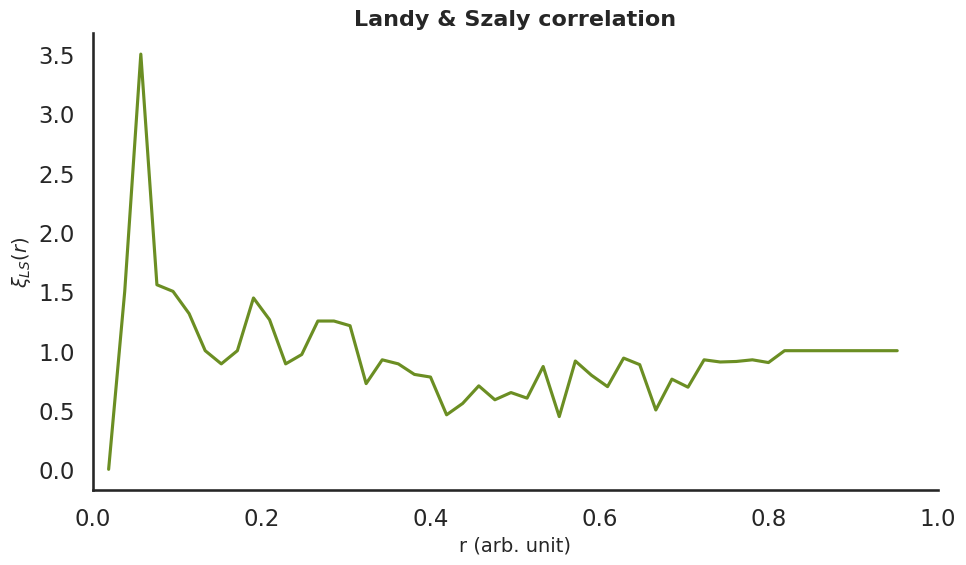

In [ ]:
# Establecer un estilo elegante de Seaborn
sns.set(style="white", context="talk")  # "talk" ajusta el tamaño de fuente para presentaciones

# Usar una paleta sutil de Seaborn
color_line = sns.color_palette("dark")[4]  # Un tono azul elegante
color_fill = sns.color_palette("dark")[4]  # Usamos el mismo color para el área

plt.figure(figsize=(10,6))
plt.plot(DD_bins[1:], correlation(DD, DR, RR), color='olivedrab', rasterized=True)
plt.title('Landy & Szaly correlation',  fontsize=NN, weight='bold')
plt.xlabel('r (arb. unit)', fontsize=nn)
plt.ylabel(r'$\xi_{LS}(r)$', fontsize=nn)

sns.despine()
plt.xlim([0,1])

plt.tight_layout()
plt.savefig('correlation_LandySzaly.pdf', format='pdf')

<ipython-input-11-09bde566bd96>:8: RuntimeWarning: divide by zero encountered in divide
  xi = (NR*dd)/(ND*dr) -1
<ipython-input-11-09bde566bd96>:8: RuntimeWarning: invalid value encountered in divide
  xi = (NR*dd)/(ND*dr) -1


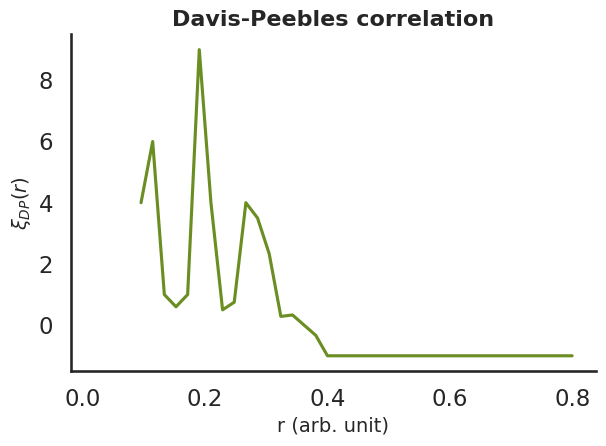

In [ ]:
# Establecer un estilo elegante de Seaborn
sns.set(style="white", context="talk")  # "talk" ajusta el tamaño de fuente para presentaciones

# Usar una paleta sutil de Seaborn
color_line = sns.color_palette("dark")[4]  # Un tono azul elegante
color_fill = sns.color_palette("dark")[4]  # Usamos el mismo color para el área

#plt.figure(figsize=(10,6))
plt.plot(DD_bins[1:], correlation_DavidPeebles(DD, DR, RR), color='olivedrab', rasterized=True)
plt.title('Davis-Peebles correlation', fontsize=NN, weight='bold')
plt.xlabel('r (arb. unit)',  fontsize=nn)
plt.ylabel(r'$\xi_{DP}(r)$',  fontsize=nn)

sns.despine()

plt.tight_layout()
plt.savefig('David_Peebles.pdf', format='pdf')

<ipython-input-11-09bde566bd96>:12: RuntimeWarning: divide by zero encountered in divide
  xi = (dd*rr)/(dr**2) -1
<ipython-input-11-09bde566bd96>:12: RuntimeWarning: invalid value encountered in divide
  xi = (dd*rr)/(dr**2) -1


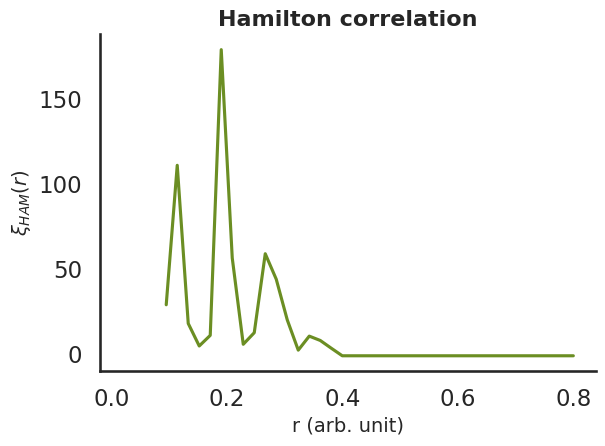

In [ ]:
# Establecer un estilo elegante de Seaborn
sns.set(style="white", context="talk")  # "talk" ajusta el tamaño de fuente para presentaciones

# Usar una paleta sutil de Seaborn
color_line = sns.color_palette("dark")[4]  # Un tono azul elegante
color_fill = sns.color_palette("dark")[4]  # Usamos el mismo color para el área

#plt.figure(figsize=(10,6))
plt.plot(DD_bins[1:], correlation_Hamilton(DD, DR, RR), color='olivedrab',rasterized=True)
plt.title('Hamilton correlation', fontsize=NN, weight='bold')
plt.xlabel('r (arb. unit)', fontsize=nn)
plt.ylabel(r'$\xi_{HAM}(r)$', fontsize=nn)

sns.despine()

plt.tight_layout()
plt.savefig('Hamilton.pdf', format='pdf')

In [ ]:
# Filter 2

r0_in = 0.1 # radius of the inner circle

data_filter_xpos_in = []
data_filter_ypos_in = []

for i in range(len(data[:])):
  s = distance(data[i,0], x0, data[i,1], y0)
  if  s <= r0 and s >= r0_in:
    data_filter_xpos_in.append(data[i,0])
    data_filter_ypos_in.append(data[i,1])
  else:
    pass

data_filter_in = np.array([data_filter_xpos_in, data_filter_ypos_in])

(0.0, 1.0)

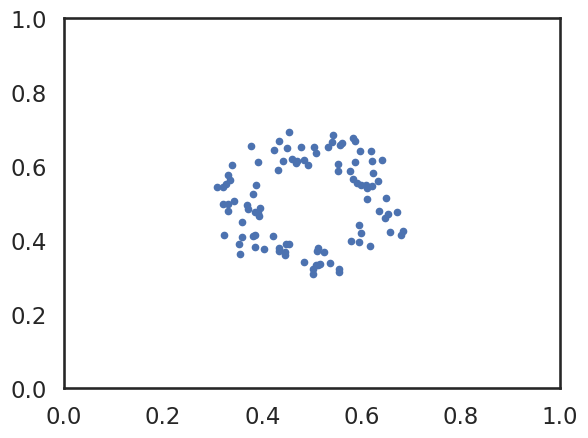

In [ ]:
plt.plot(data_filter_in[0], data_filter_in[1],".")
plt.xlim([0, 1])
plt.ylim([0, 1])

In [ ]:
#plt.hist(DD_distances2);

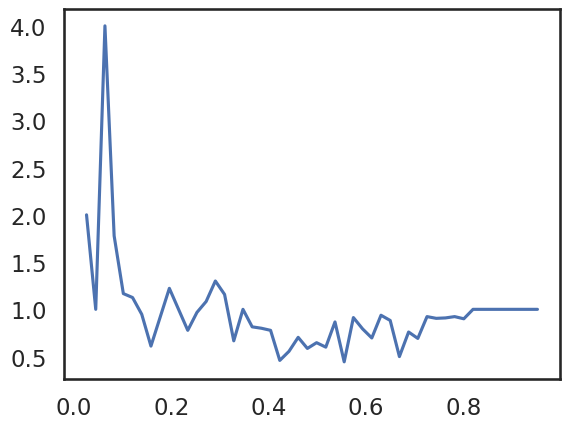

In [ ]:
DD_distances2 = distanceS(data_filter_in.T)

combined_data = RR_distances + DD_distances2
min_val = min(combined_data)
max_val = max(combined_data)
bin_edges = np.linspace(min_val, max_val, num_bins + 1)

DD2, DD_bins2 = np.histogram(DD_distances2, bins=bin_edges)

plt.plot(DD_bins2[1:], correlation(DD2,DR, RR))

# Second arrangement proposed

## Grid points

In [ ]:
grid_x = np.linspace(0,1,10)

grid_y =[]
for i in range(len(grid_x)):
  grid_y.append(grid_x)

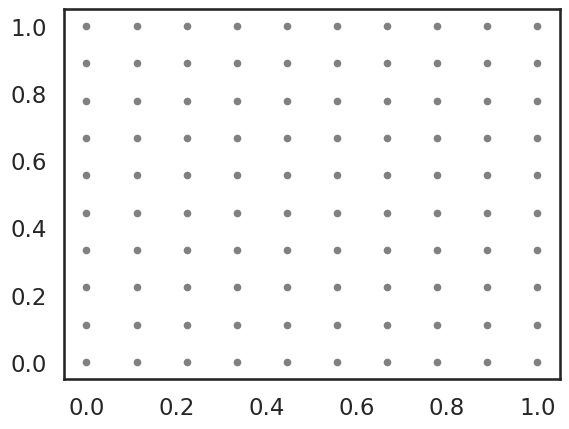

In [ ]:
plt.plot(grid_x, grid_y, '.', color='gray');

# Comparación entre dos randoms

In [ ]:
# Parámetros
n_points = 1000  # Número de puntos

# Coordenadas completamente aleatorias entre 0 y 1
x_random = np.random.rand(n_points)
y_random = np.random.rand(n_points)

# Coordenadas basadas en una distribución normal truncada entre 0 y 1
mean = 0.5  # Media de la distribución
std_dev = 0.1  # Desviación estándar
x_distribution = np.clip(np.random.normal(mean, std_dev, n_points), 0, 1)
y_distribution = np.clip(np.random.normal(mean, std_dev, n_points), 0, 1)


data_random = np.zeros((n_points, n_points))
data_normal = np.zeros((n_points, n_points))


data_random[:,0] = x_random
data_random[:,1] = y_random

data_normal[:,0] = x_distribution
data_normal[:,1] = y_distribution


#data_random = np.array([x_random , y_random ])
#data_normal = np.array([x_distribution , x_distribution ])

In [ ]:
RR_distances = distanceS(data)

DD_distances1 = distanceS(data_random)
DD_distances2 = distanceS(data_normal)

DR_distances1 = distanceSS(data_random, data)
DR_distances2 = distanceSS(data_normal, data)

In [ ]:
# para primer set

combined_data = RR_distances + DD_distances1 + DR_distances1
min_val = min(combined_data)
max_val = max(combined_data)

num_bins = 50
bin_edges = np.linspace(min_val, max_val, num_bins + 1)

RR, RR_bins = np.histogram(RR_distances, bins=bin_edges)
DD1, DD_bins1 = np.histogram(DD_distances1, bins=bin_edges)
DR1, DR_bins1 = np.histogram(DR_distances1, bins=bin_edges)

In [ ]:
# para segundo set

combined_data = RR_distances + DD_distances2 + DR_distances2
min_val = min(combined_data)
max_val = max(combined_data)

num_bins = 50
bin_edges = np.linspace(min_val, max_val, num_bins + 1)

RR, RR_bins = np.histogram(RR_distances, bins=bin_edges)
DD2, DD_bins2 = np.histogram(DD_distances2, bins=bin_edges)
DR2, DR_bins2 = np.histogram(DR_distances2, bins=bin_edges)

In [ ]:
import math

y1 = correlation(DD1, DR1, RR)
y2 = correlation(DD2, DR2, RR)


#for i in range(1, len(y1)):
#  if math.isnan(y1[i]):
#    y1[i] = y1[i-1]

#for i in range(1, len(y2)):
#  if math.isnan(y2[i]):
#    y2[i] = y2[i-1]

In [ ]:
y1_mask = np.isfinite(y1)
y2_mask = np.isfinite(y2)

<Figure size 640x480 with 0 Axes>

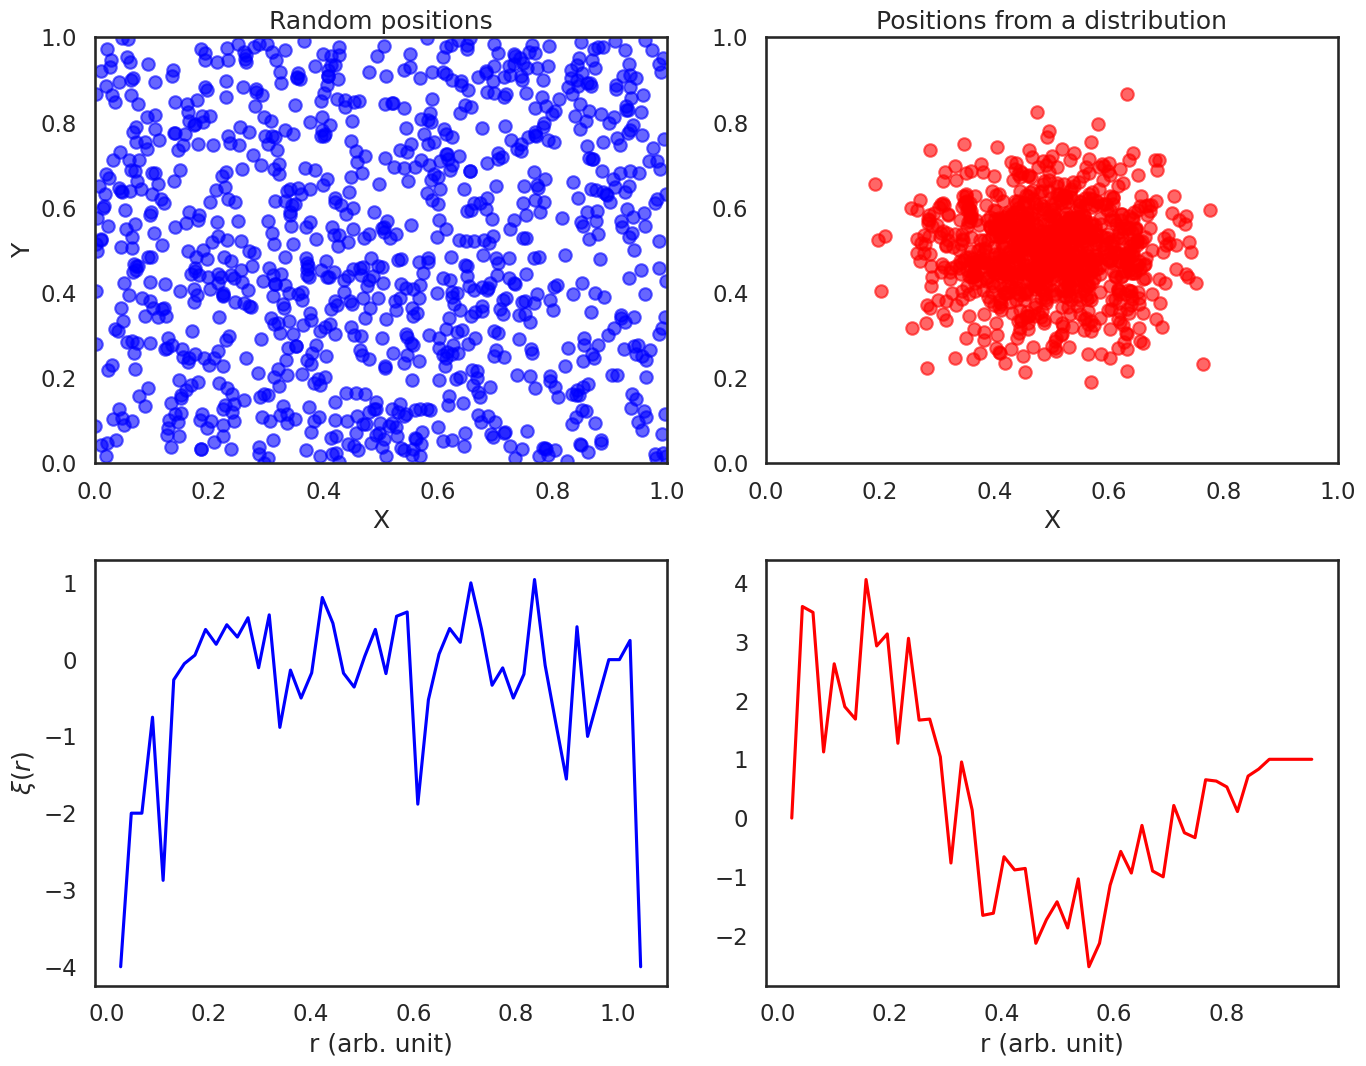

In [ ]:
# Establecer un estilo elegante de Seaborn
sns.set(style="white", context="talk")  # "talk" ajusta el tamaño de fuente para presentaciones

# Usar una paleta sutil de Seaborn
color_line = sns.color_palette("dark")[4]  # Un tono azul elegante
color_fill = sns.color_palette("dark")[4]  # Usamos el mismo color para el área

plt.tight_layout()

# Crear las figuras
fig, axes = plt.subplots(2, 2, figsize=(14, 11))

# Scatter plot para las coordenadas completamente aleatorias
axes[0,0].scatter(x_random, y_random, c='blue', alpha=0.6)
axes[0,0].set_title("Random positions")
axes[0,0].set_xlim(0, 1)
axes[0,0].set_ylim(0, 1)
axes[0,0].set_xlabel("X")
axes[0,0].set_ylabel("Y")
#axes[0].grid(True)

# Scatter plot para las coordenadas basadas en la distribución
axes[0,1].scatter(x_distribution, y_distribution, c='red', alpha=0.6)
axes[0,1].set_title("Positions from a distribution")
axes[0,1].set_xlim(0, 1)
axes[0,1].set_ylim(0, 1)
axes[0,1].set_xlabel("X")
#axes[0,1].set_ylabel("Y")
#axes[1].grid(True)

axes[1,0].plot(DD_bins1[1:][y1_mask], y1[y1_mask], '-', c='blue')
#axes[1,0].set_title("2PCF for random positions")
#axes[1,0].set_xlim(0, 1)
#axes[1,0].set_ylim(0, 1)
axes[1,0].set_xlabel("r (arb. unit)")
axes[1,0].set_ylabel(r"$\xi (r)$")


axes[1,1].plot(DD_bins2[1:][y2_mask], y2[y2_mask], '-', c='red')
#axes[1,1].set_title("2PCF for the distribution")
#axes[1,1].set_xlim(0, 1)
#axes[1,1].set_ylim(0, 1)
axes[1,1].set_xlabel("r (arb. unit)")
#axes[1,1].set_ylabel(r"$\xi (r)$")


# Ajustar diseño y mostrar
plt.tight_layout()
plt.savefig('2PCF.pdf', format='pdf')

plt.show()

